## PCA(Principal Component Analysis)

In [41]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200
%matplotlib inline

In [ ]:
# Read the data

In [42]:
df=pd.read_csv(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\PCA\PCA\wine.csv')

In [43]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [44]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [45]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [ ]:
#check for duplicates

In [46]:
df.duplicated().sum()

0

In [ ]:
# check for null value

In [47]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
# correlation coefficient

In [48]:
df.corr()

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

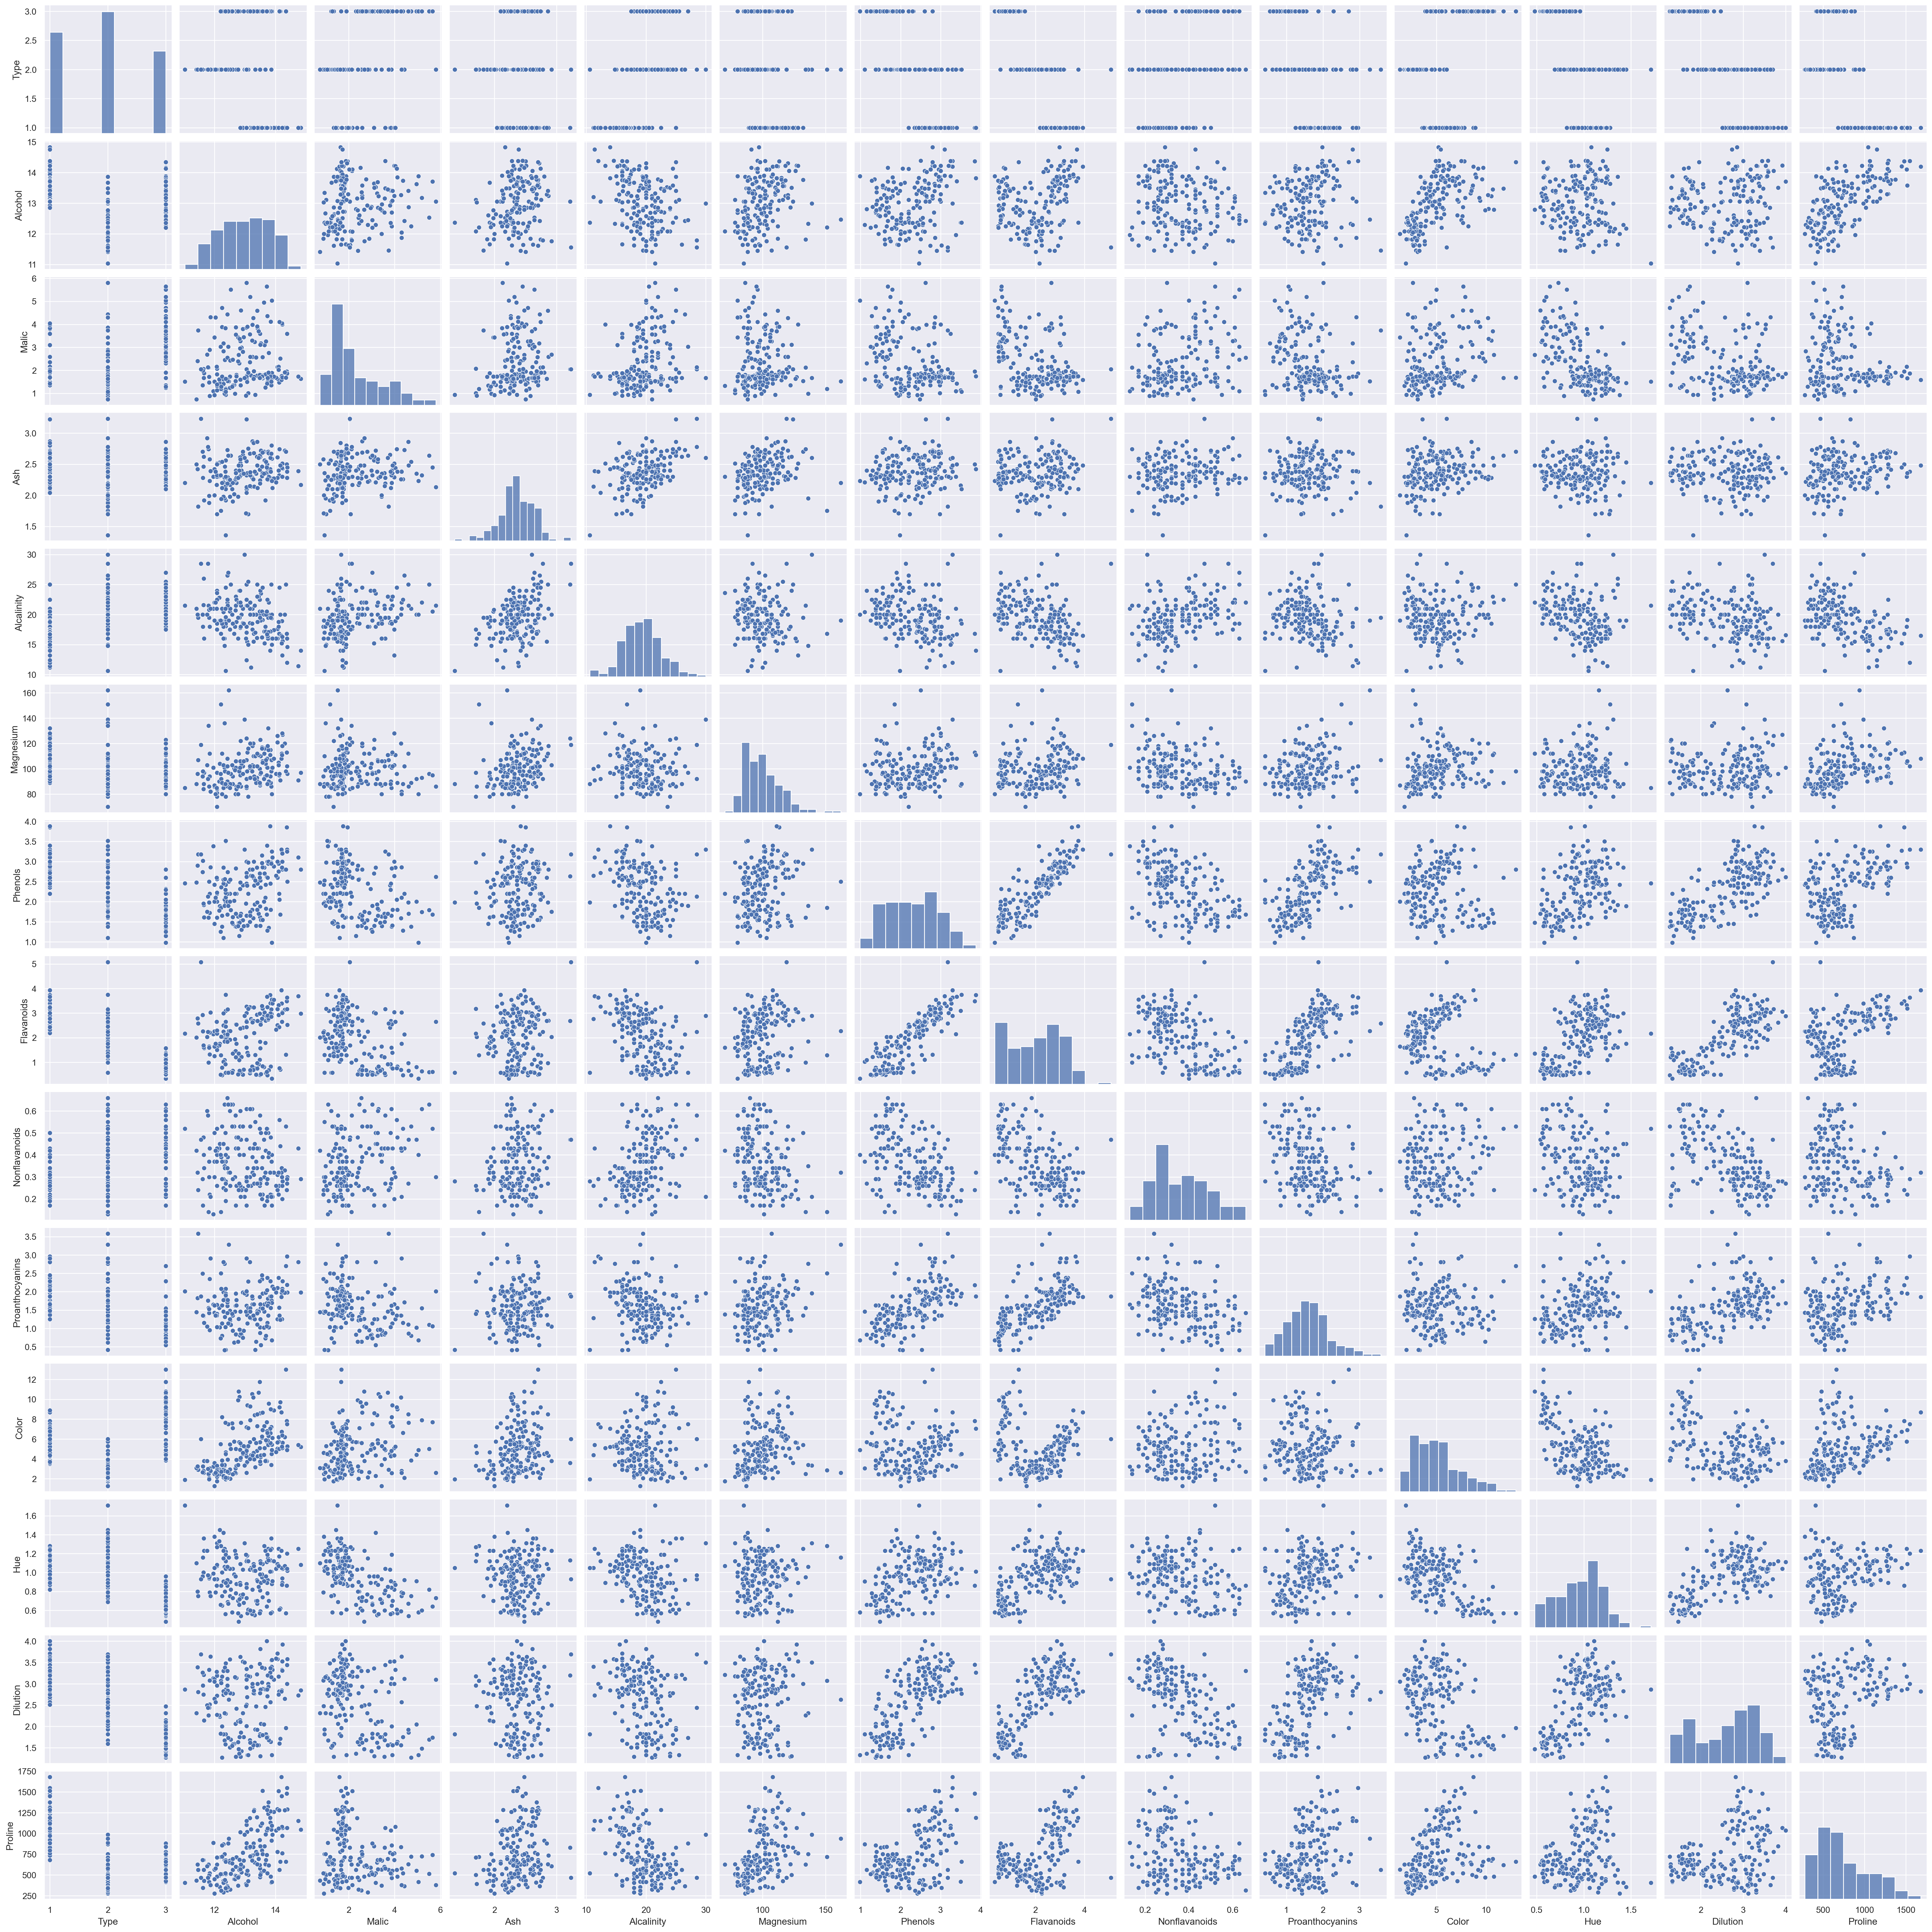

In [12]:
sns.pairplot(df)

Text(0, 0.5, 'Flavanoids')

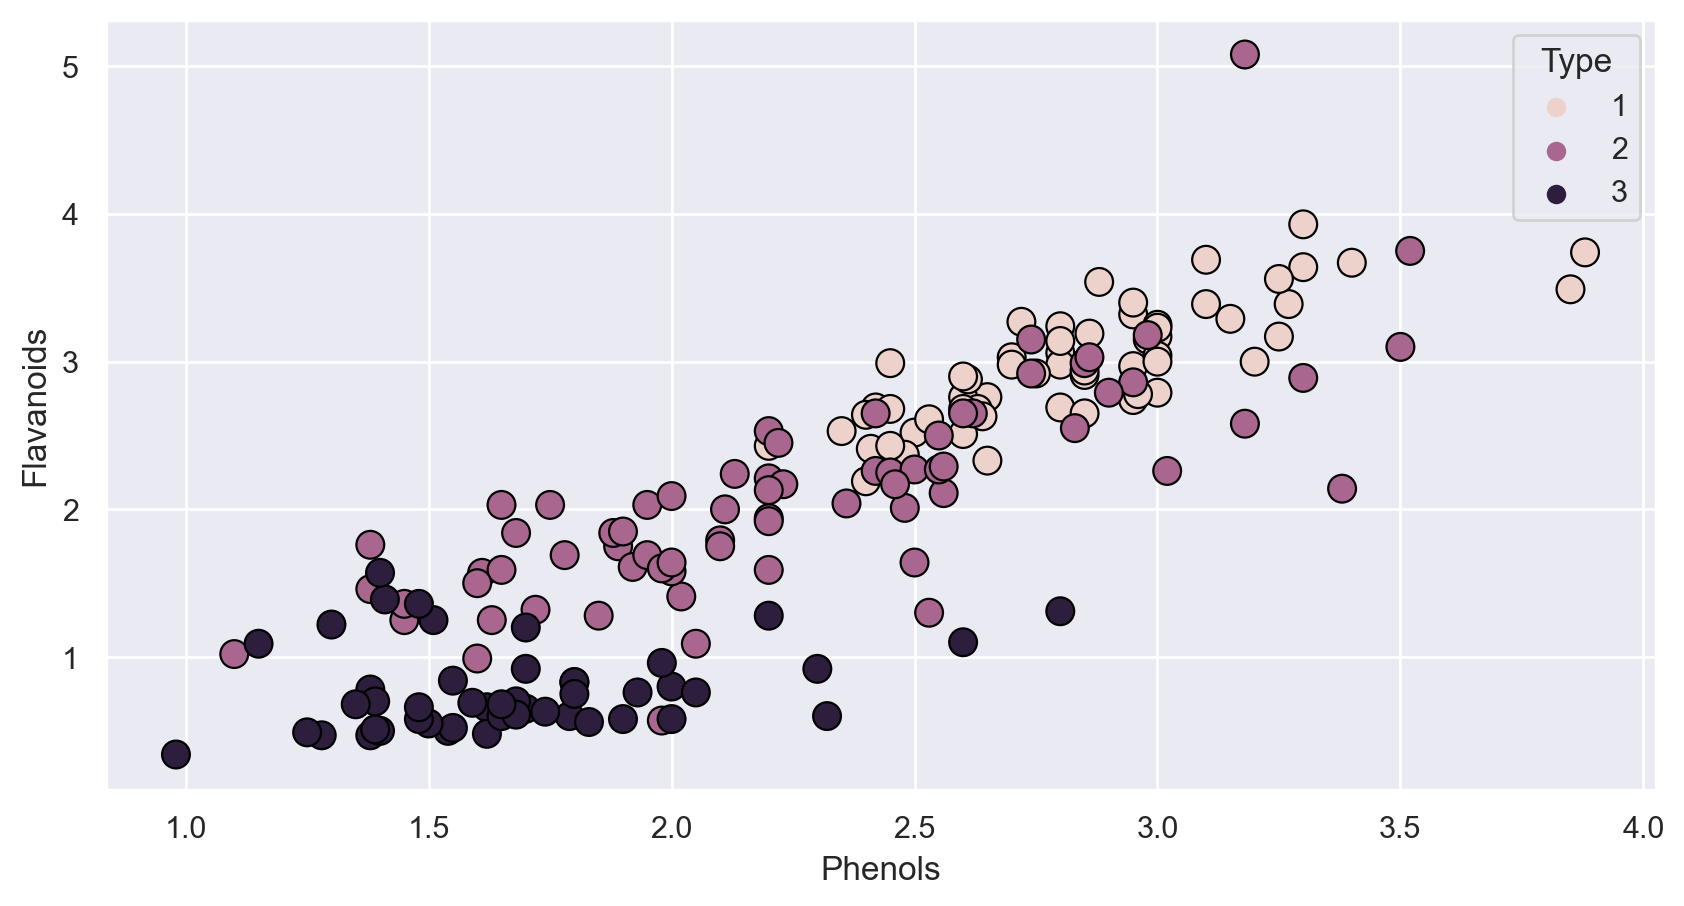

In [16]:
sns.scatterplot(x = df['Phenols'], y = df['Flavanoids'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')

###  Dimensionality Reduction with PCA:

In [49]:
x = df.iloc[:,1:]
y = df['Type']

In [50]:
x

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [52]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [53]:
pca = PCA()
pcs = pca.fit_transform(x)

In [54]:
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [55]:
pd.DataFrame(pcs)

0         1         2         3         4         5         6   \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

           7         8         9         10        11        12  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [56]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [57]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

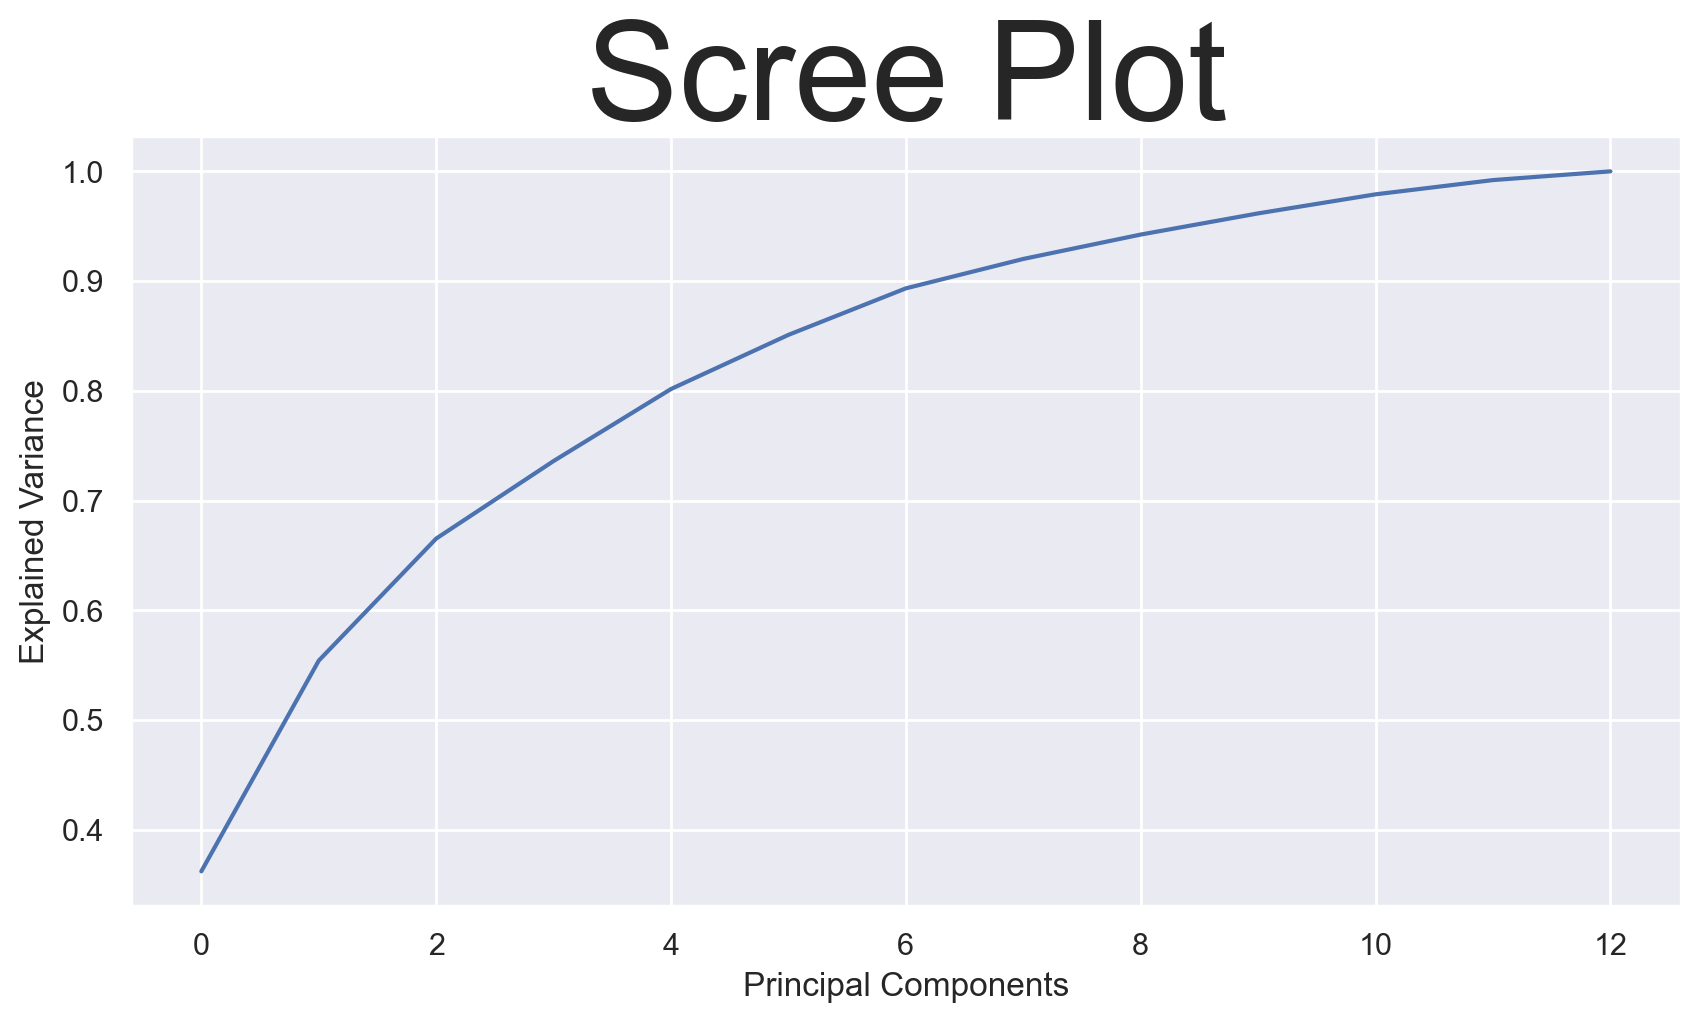

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 50)

In [58]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [59]:
data = pd.DataFrame(pcs,columns=['PC1','PC2'])
data

PC1       PC2
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
..        ...       ...
173 -3.370524 -2.216289
174 -2.601956 -1.757229
175 -2.677839 -2.760899
176 -2.387017 -2.297347
177 -3.208758 -2.768920

[178 rows x 2 columns]

In [60]:
data['Type'] = y

In [61]:
data

PC1       PC2  Type
0    3.316751 -1.443463     1
1    2.209465  0.333393     1
2    2.516740 -1.031151     1
3    3.757066 -2.756372     1
4    1.008908 -0.869831     1
..        ...       ...   ...
173 -3.370524 -2.216289     3
174 -2.601956 -1.757229     3
175 -2.677839 -2.760899     3
176 -2.387017 -2.297347     3
177 -3.208758 -2.768920     3

[178 rows x 3 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

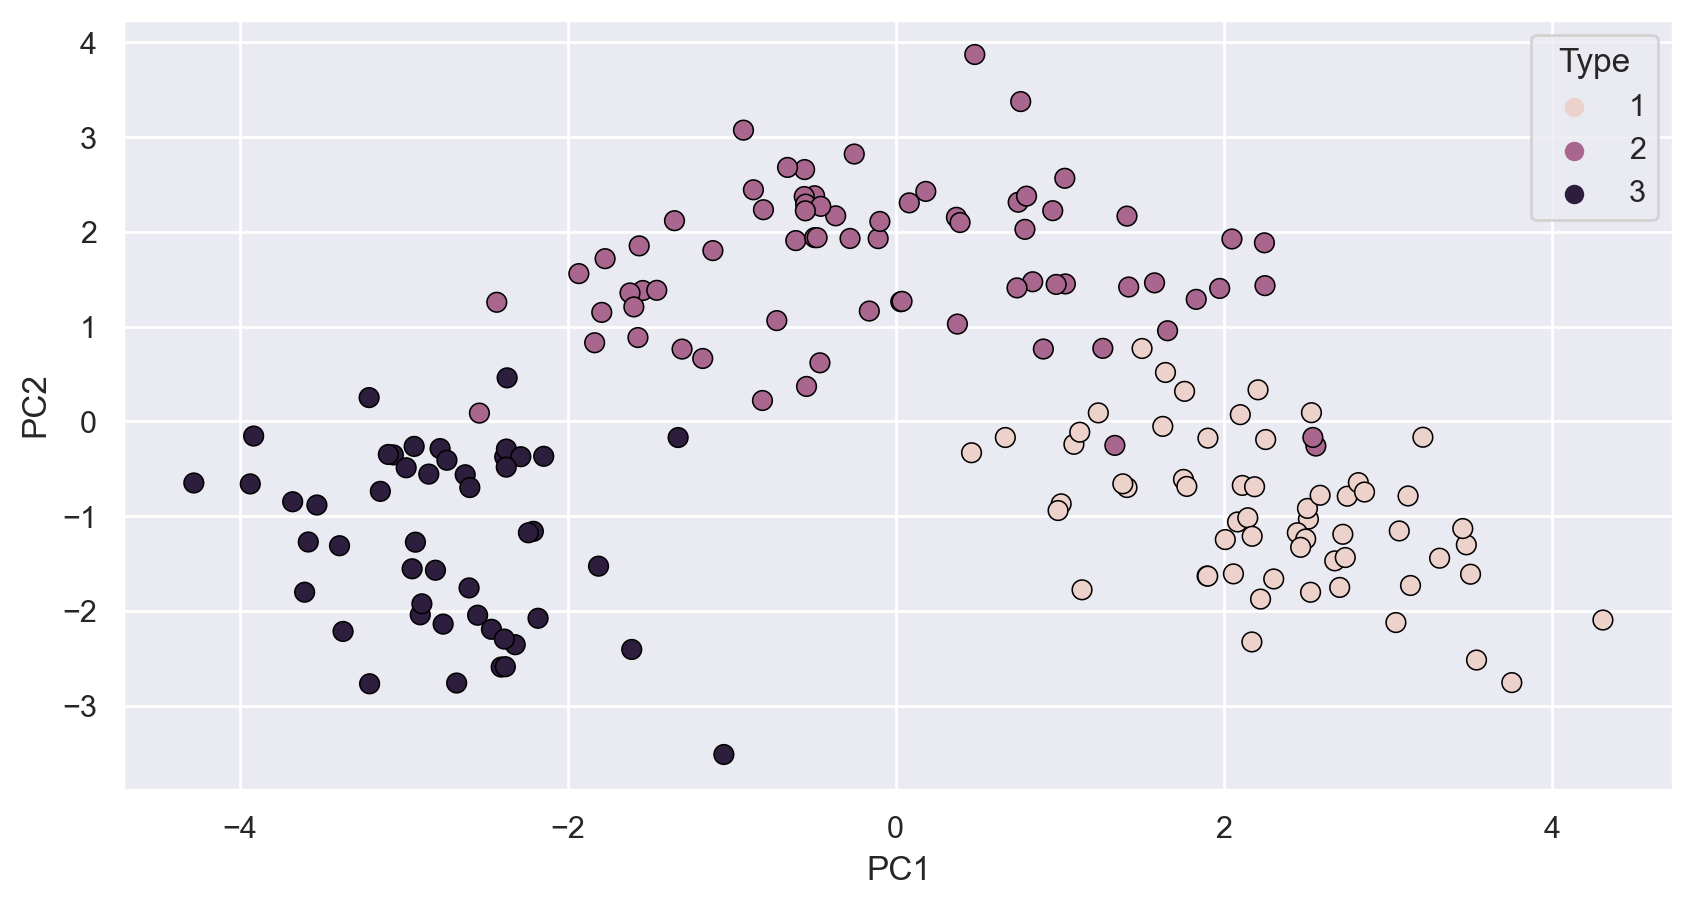

In [34]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],s = 50, edgecolor = 'black',hue=data['Type'])

In [62]:
data

PC1       PC2  Type
0    3.316751 -1.443463     1
1    2.209465  0.333393     1
2    2.516740 -1.031151     1
3    3.757066 -2.756372     1
4    1.008908 -0.869831     1
..        ...       ...   ...
173 -3.370524 -2.216289     3
174 -2.601956 -1.757229     3
175 -2.677839 -2.760899     3
176 -2.387017 -2.297347     3
177 -3.208758 -2.768920     3

[178 rows x 3 columns]

In [63]:
x = data.iloc[:,:-1]
y = data['Type']

In [64]:
x

PC1       PC2
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
..        ...       ...
173 -3.370524 -2.216289
174 -2.601956 -1.757229
175 -2.677839 -2.760899
176 -2.387017 -2.297347
177 -3.208758 -2.768920

[178 rows x 2 columns]

In [65]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [ ]:
# split the data into training and testing part

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [41]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [43]:
ypred = lg.predict(xtest)
ypred

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2], dtype=int64)

In [44]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



### Clustering with Original Data(k-mean):

In [ ]:
# given data

In [4]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [5]:
df.drop(columns=['Type'],inplace=True)

In [6]:
df

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

In [ ]:
#Data Visualization

<Axes: xlabel='Phenols', ylabel='Flavanoids'>

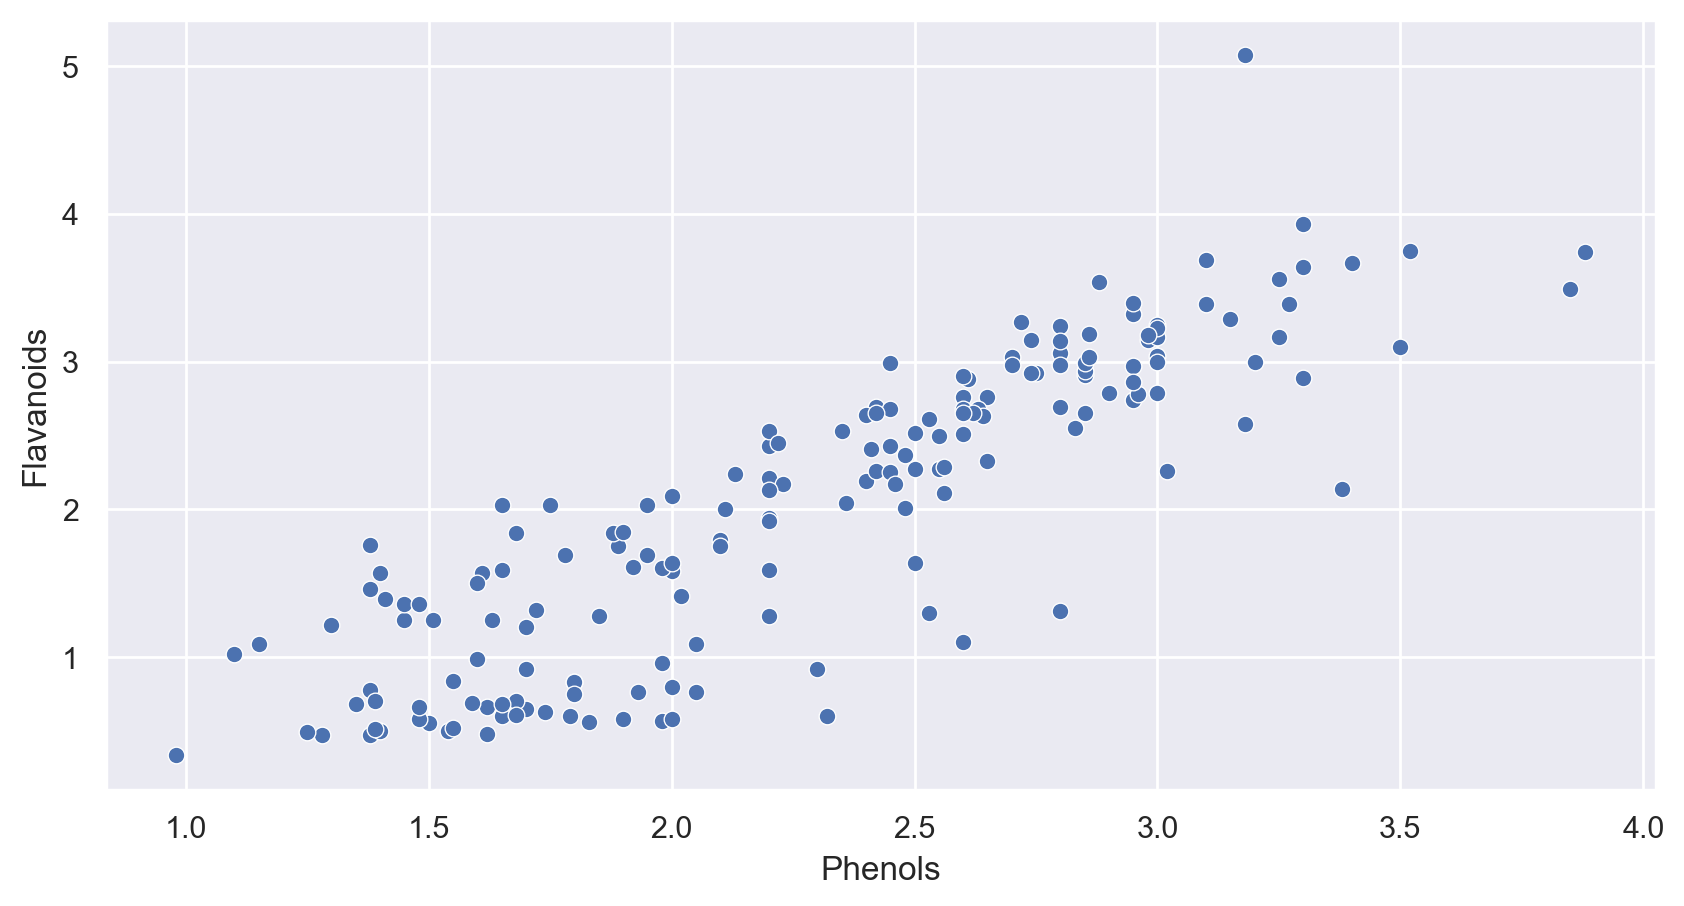

In [8]:
sns.scatterplot(x=df['Phenols'],y=df['Flavanoids'])

In [ ]:
# Standardization 

In [9]:
sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# Model Building

In [13]:
from sklearn.cluster import KMeans

In [11]:
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [31]:
km=KMeans()
yp=km.fit_transform(x)
yp

array([[2.16445495, 6.21056325, 5.2923601 , ..., 2.33897787, 5.7675357 ,
        4.11038593],
       [2.14937622, 6.04249393, 4.90923394, ..., 3.11439742, 4.24235493,
        5.09667903],
       [2.51809292, 5.55571301, 4.10521921, ..., 2.00273686, 5.37710579,
        4.5389513 ],
       ...,
       [5.67333242, 2.03209145, 6.05942099, ..., 5.85262728, 4.93310924,
        6.13789321],
       [5.40400555, 1.8351678 , 5.39380244, ..., 5.37721411, 4.24415481,
        5.65030795],
       [6.23196839, 2.30773661, 5.53675362, ..., 6.12114066, 5.29552377,
        7.38196937]])

In [15]:
len(yp)

178

In [32]:
#cluster centre
km.cluster_centers_

array([[ 0.86529463, -0.08748573, -0.16868113, -0.97941268,  0.35620925,
         0.76270782,  0.85038655, -0.85951608,  0.45202021,  0.017328  ,
         0.18830867,  1.08206168,  0.75942887],
       [ 0.41754227,  0.65938814,  0.36331251,  0.69080885,  0.22878504,
        -0.87345073, -1.12736028,  0.46852973, -0.32013566,  1.89567939,
        -1.47452225, -1.38529044, -0.34836215],
       [-1.0890318 , -0.37329171,  0.773043  ,  1.13659557, -0.40313502,
         0.08474353,  0.29288755,  0.48061644,  0.10705431, -0.92682007,
         0.72193905,  0.43830164, -0.73734806],
       [-0.95015272, -0.2958362 , -1.00031954, -0.13039261, -0.77175506,
         0.42558235,  0.37578652, -0.60200736,  0.42017677, -0.83944093,
         0.29166647,  0.63019208, -0.8452569 ],
       [-0.01739193,  1.28728154,  0.18706373,  0.58476415, -0.36262733,
        -1.06942821, -1.30056209,  0.94579979, -1.09123646,  0.22742638,
        -0.95739921, -1.15134843, -0.41572644],
       [ 0.99382417, -0.471904

In [ ]:
#Visualize the clusters

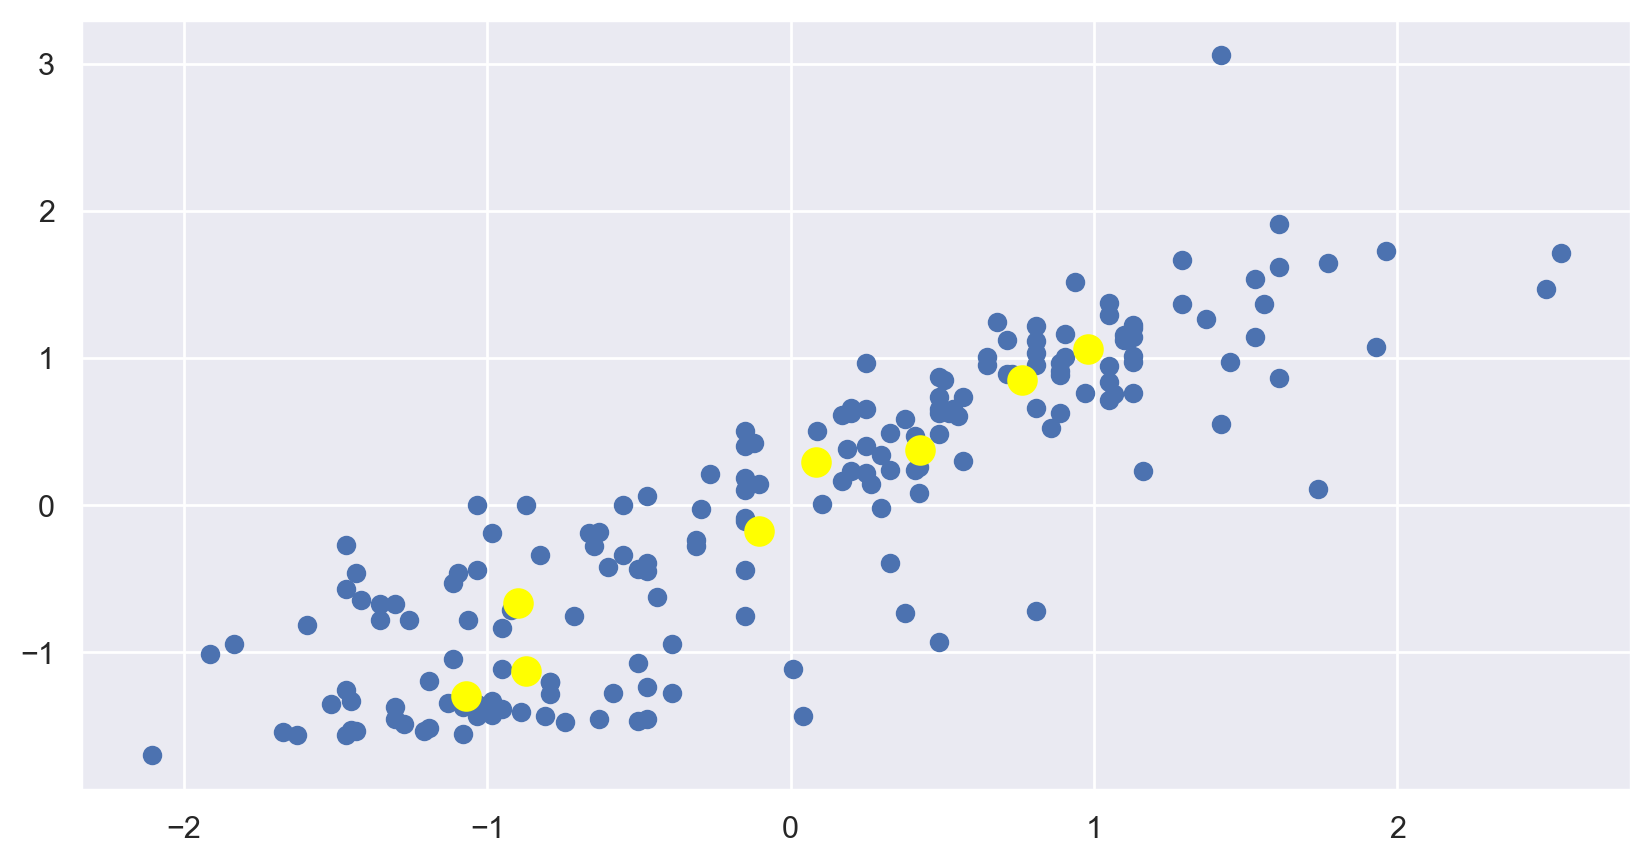

In [33]:
plt.scatter(x[:,5],x[:,6],cmap='viridis')
plt.scatter(km.cluster_centers_[:,5],km.cluster_centers_[:,6], c = 'yellow' ,s = 100 )

In [19]:
km.inertia_

944.8511599834526

### Elbow Graph

In [20]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [21]:
wcss

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1175.3789993448738,
 1110.7229523356032,
 1044.290221229464,
 988.4256405280474,
 946.3397497215313,
 889.4816232980252,
 846.8157011280317]

Text(0.5, 1.0, 'Elbow Graph')

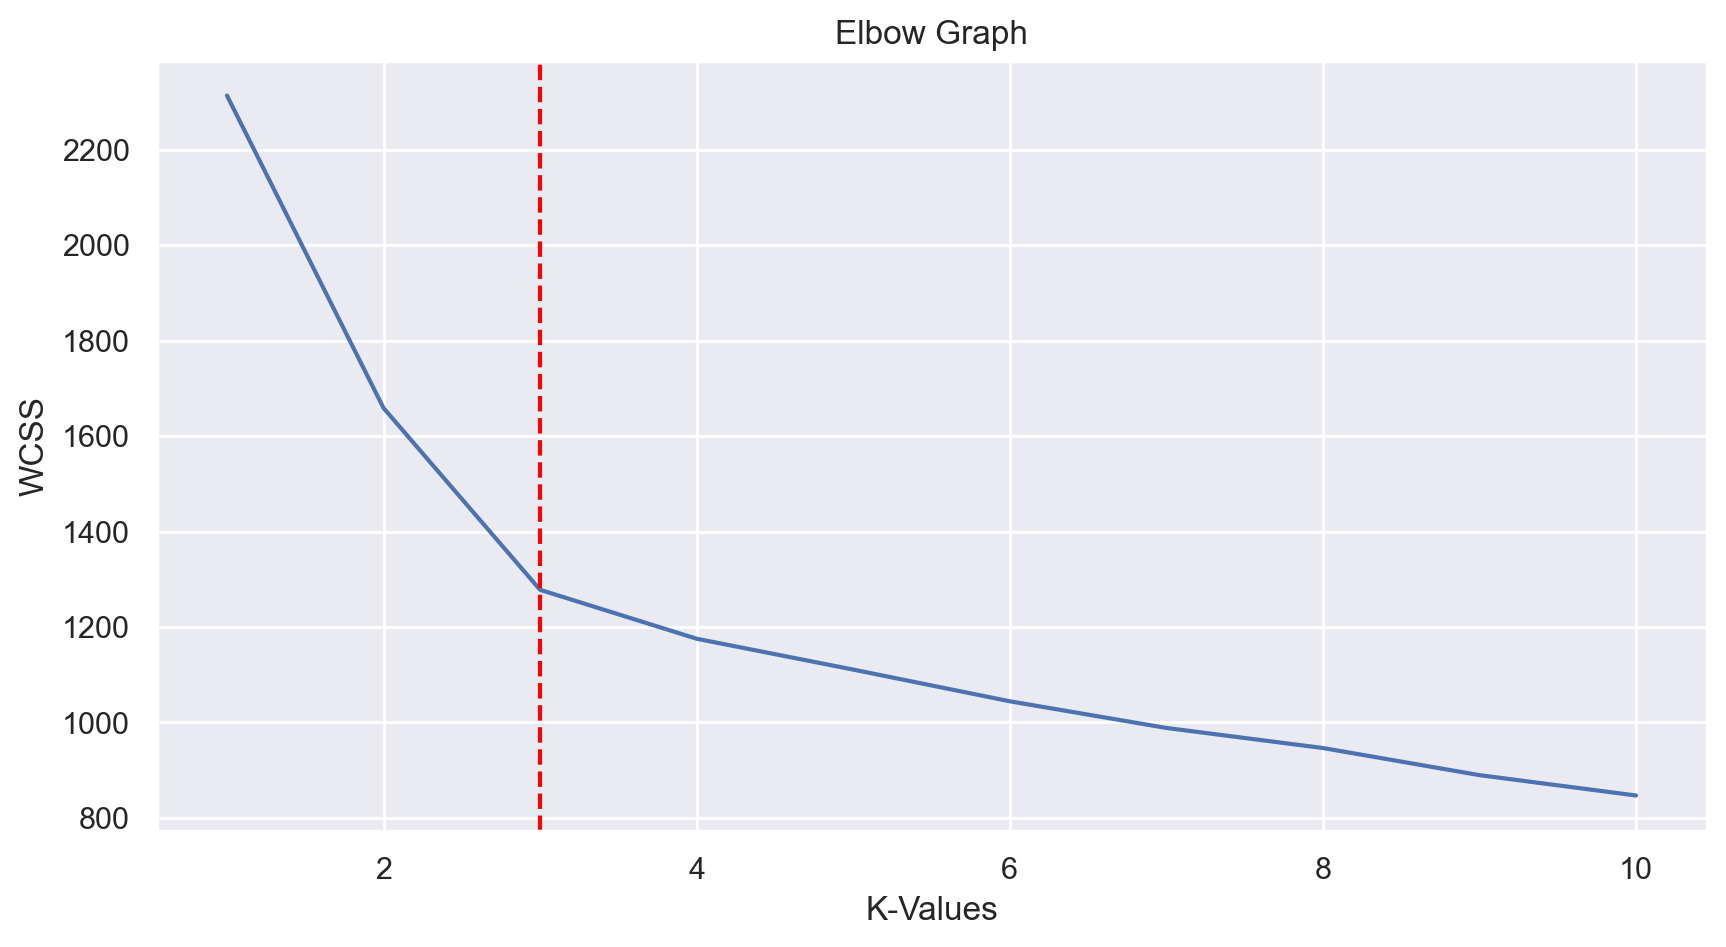

In [23]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 3, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [ ]:
#final model

In [24]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [25]:
km.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

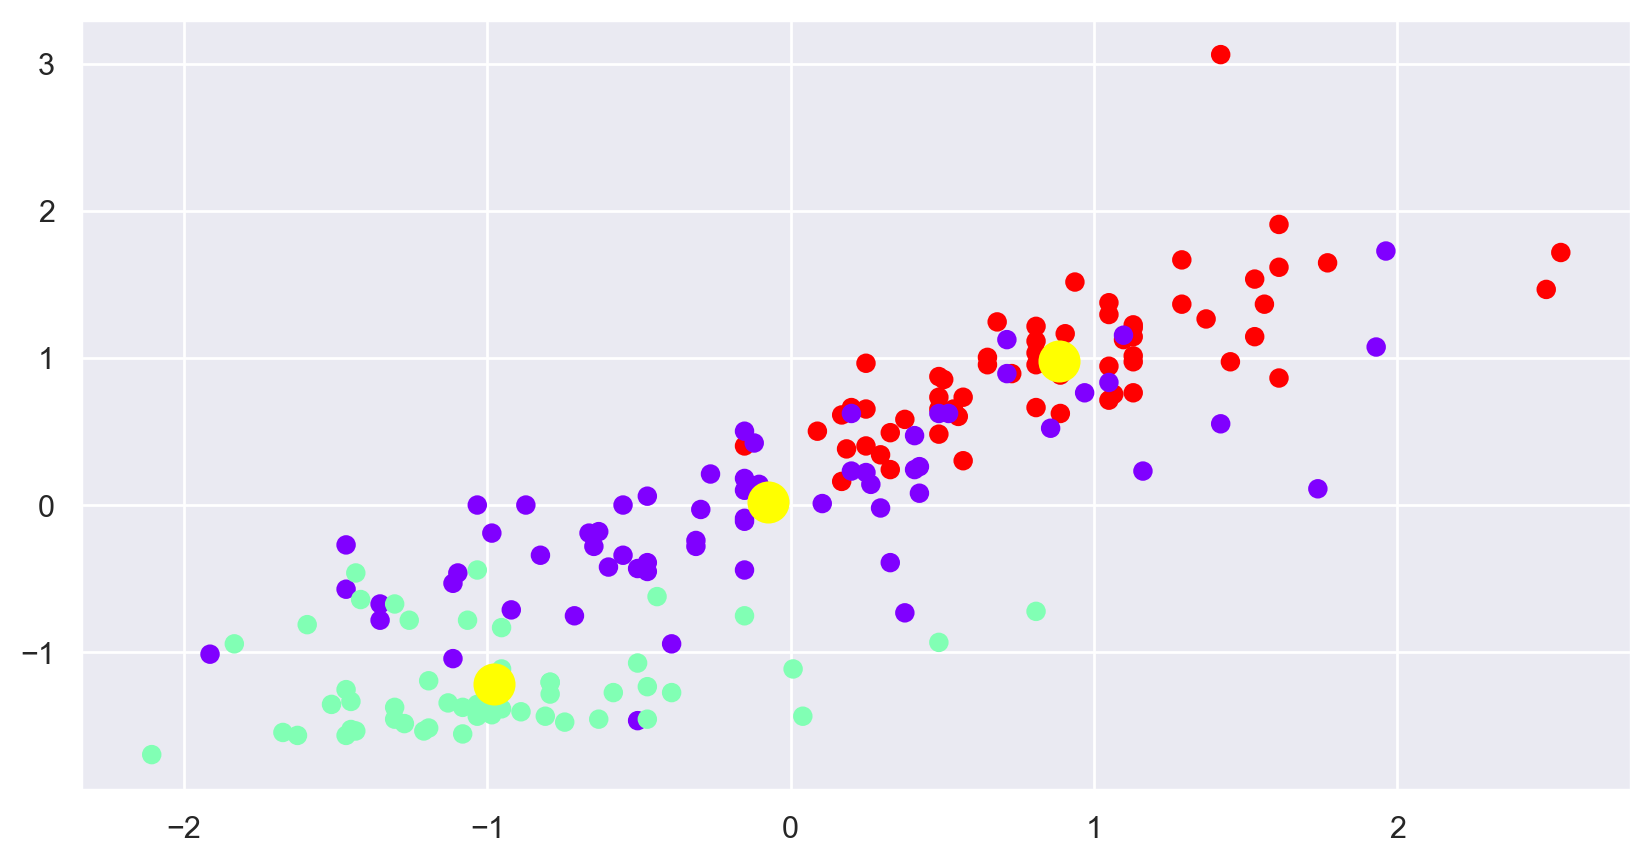

In [26]:
plt.scatter(x[:,5],x[:,6], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,5],km.cluster_centers_[:,6], c = 'yellow',s = 200)

In [ ]:
#Silhouette score

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [37]:
silhouette_score(x,ypred)

0.2848589191898987

In [38]:
#Analyzing clusters
df['cluster'] = ypred
df

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  cluster  
0             0.28             2.29   5.64  1.04      3.92     1065        2  
1             0.26             1.28   4.38  1.05      3.40     1050        2  
2             0.30             2.81   5.68  1.03      3.17     1185        2  
3             0.24             2.18   7.80  0.86      3.45     1480        2  
4             0.39             1.82   4.32  1.04      2.93      735        2  
..             ...              ...    ...   ...       ...      ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740        1  
174           0.43             1.41   7.30  0.70      1.56      750        1  
175           0.43             1.35  10.20  0.59      1.56      835        1  
176           0.53             1.46   9.30  0.60      1.62      840        1  
177           0.56             1.35   9.20  0.61      1.60      560        1  

[178 rows x 14 columns]

In [39]:
df.groupby('cluster').agg('mean')

Alcohol     Malic       Ash  Alcalinity   Magnesium   Phenols  \
cluster                                                                    
0        12.250923  1.897385  2.231231   20.063077   92.738462  2.247692   
1        13.134118  3.307255  2.417647   21.241176   98.666667  1.683922   
2        13.676774  1.997903  2.466290   17.462903  107.967742  2.847581   

         Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  \
cluster                                                                   
0          2.050000       0.357692         1.624154  2.973077  1.062708   
1          0.818824       0.451961         1.145882  7.234706  0.691961   
2          3.003226       0.292097         1.922097  5.453548  1.065484   

         Dilution      Proline  
cluster                         
0        2.803385   510.169231  
1        1.696667   619.058824  
2        3.163387  1100.225806

In [40]:
df['cluster'].value_counts()

cluster
0    65
2    62
1    51
Name: count, dtype: int64

### Clustering with PCA Data:

In [ ]:
# PCA Dataset

In [66]:
data

PC1       PC2  Type
0    3.316751 -1.443463     1
1    2.209465  0.333393     1
2    2.516740 -1.031151     1
3    3.757066 -2.756372     1
4    1.008908 -0.869831     1
..        ...       ...   ...
173 -3.370524 -2.216289     3
174 -2.601956 -1.757229     3
175 -2.677839 -2.760899     3
176 -2.387017 -2.297347     3
177 -3.208758 -2.768920     3

[178 rows x 3 columns]

In [68]:
data.drop(columns=['Type'],inplace=True)

In [69]:
data

PC1       PC2
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
..        ...       ...
173 -3.370524 -2.216289
174 -2.601956 -1.757229
175 -2.677839 -2.760899
176 -2.387017 -2.297347
177 -3.208758 -2.768920

[178 rows x 2 columns]

In [ ]:
# Data Visualization 

<Axes: xlabel='PC1', ylabel='PC2'>

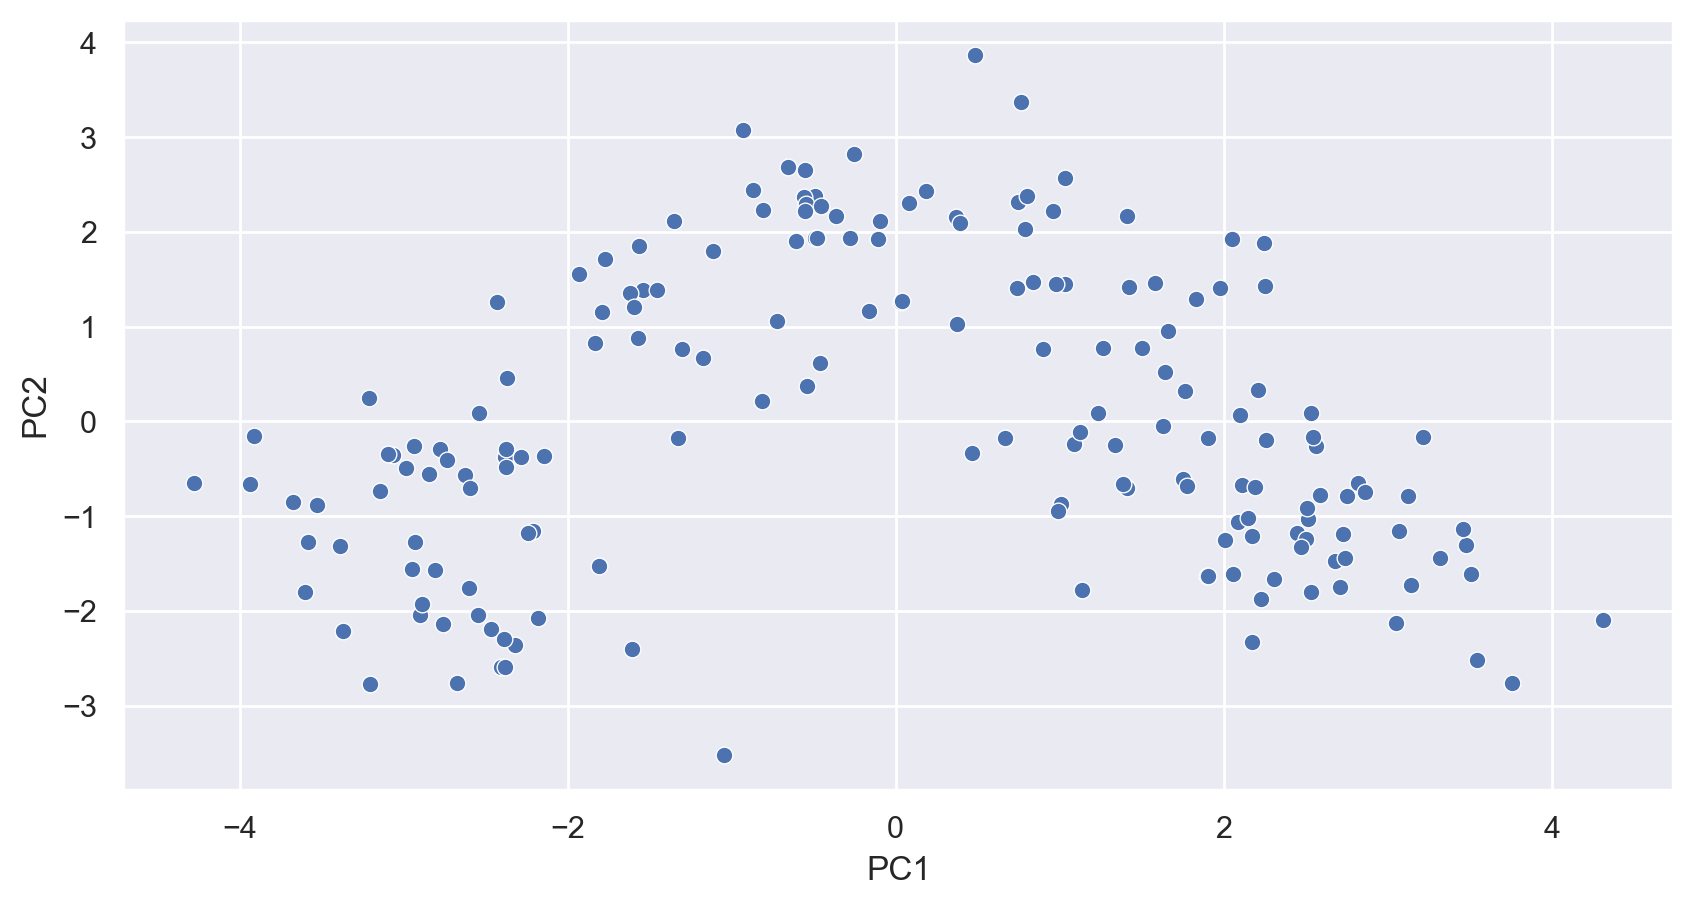

In [70]:
sns.scatterplot(x=data['PC1'],y=data['PC2'])

In [90]:
 sc = StandardScaler()
x_= sc.fit_transform(data)
x_

array([[ 1.52895179, -0.91347898],
       [ 1.01851648,  0.21098391],
       [ 1.16016384, -0.65255242],
       [ 1.73192758, -1.74433875],
       [ 0.46508542, -0.55046259],
       [ 1.40610238, -1.34313751],
       [ 1.1289784 , -0.7434906 ],
       [ 0.94935673, -1.01821406],
       [ 1.15745981, -0.58099081],
       [ 1.2693642 , -0.49958669],
       [ 1.60408482, -0.82416684],
       [ 0.80890388, -0.38728286],
       [ 0.97426132, -0.4276131 ],
       [ 1.59413696, -0.71550631],
       [ 1.98810193, -1.32641441],
       [ 1.06264288, -1.05212704],
       [ 1.00122533, -1.47280883],
       [ 0.87538544, -1.03239332],
       [ 1.63278002, -1.59370527],
       [ 0.96092053, -0.67152916],
       [ 1.44028332, -0.49797892],
       [ 0.50088576, -0.15298467],
       [ 1.16868454,  0.0581203 ],
       [ 0.75830474,  0.32672127],
       [ 0.81204912,  0.20070411],
       [ 0.45640547, -0.59529067],
       [ 0.81836534, -0.43423816],
       [ 0.56950425,  0.05683337],
       [ 1.00880892,

In [ ]:
#model building

In [95]:
km = KMeans()
y_p = km.fit_predict(x_)
y_p

array([3, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 7, 3, 7, 7, 7, 7, 0, 3, 3, 7, 3, 7,
       7, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 2, 5, 5, 6, 0, 2, 0,
       0, 2, 6, 0, 5, 0, 6, 7, 0, 2, 2, 5, 0, 6, 2, 0, 2, 1, 0, 2, 2, 2,
       5, 2, 5, 5, 5, 2, 2, 7, 6, 2, 0, 0, 2, 2, 6, 2, 2, 5, 2, 5, 2, 0,
       0, 2, 6, 2, 2, 2, 2, 2, 5, 2, 0, 7, 6, 6, 0, 2, 6, 5, 2, 5, 6, 1,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4])

In [92]:
len(y_p)

178

In [96]:
#cluster centre
km.cluster_centers_

array([[ 0.68221853,  0.87093526],
       [-1.36284835, -0.3667437 ],
       [-0.04008358,  1.50817663],
       [ 1.23852616, -0.91442593],
       [-1.17393245, -1.39659588],
       [-0.7887941 ,  0.85703536],
       [-0.25428127,  0.47458293],
       [ 0.79103005, -0.16550652]])

In [ ]:
# visualize the cluster

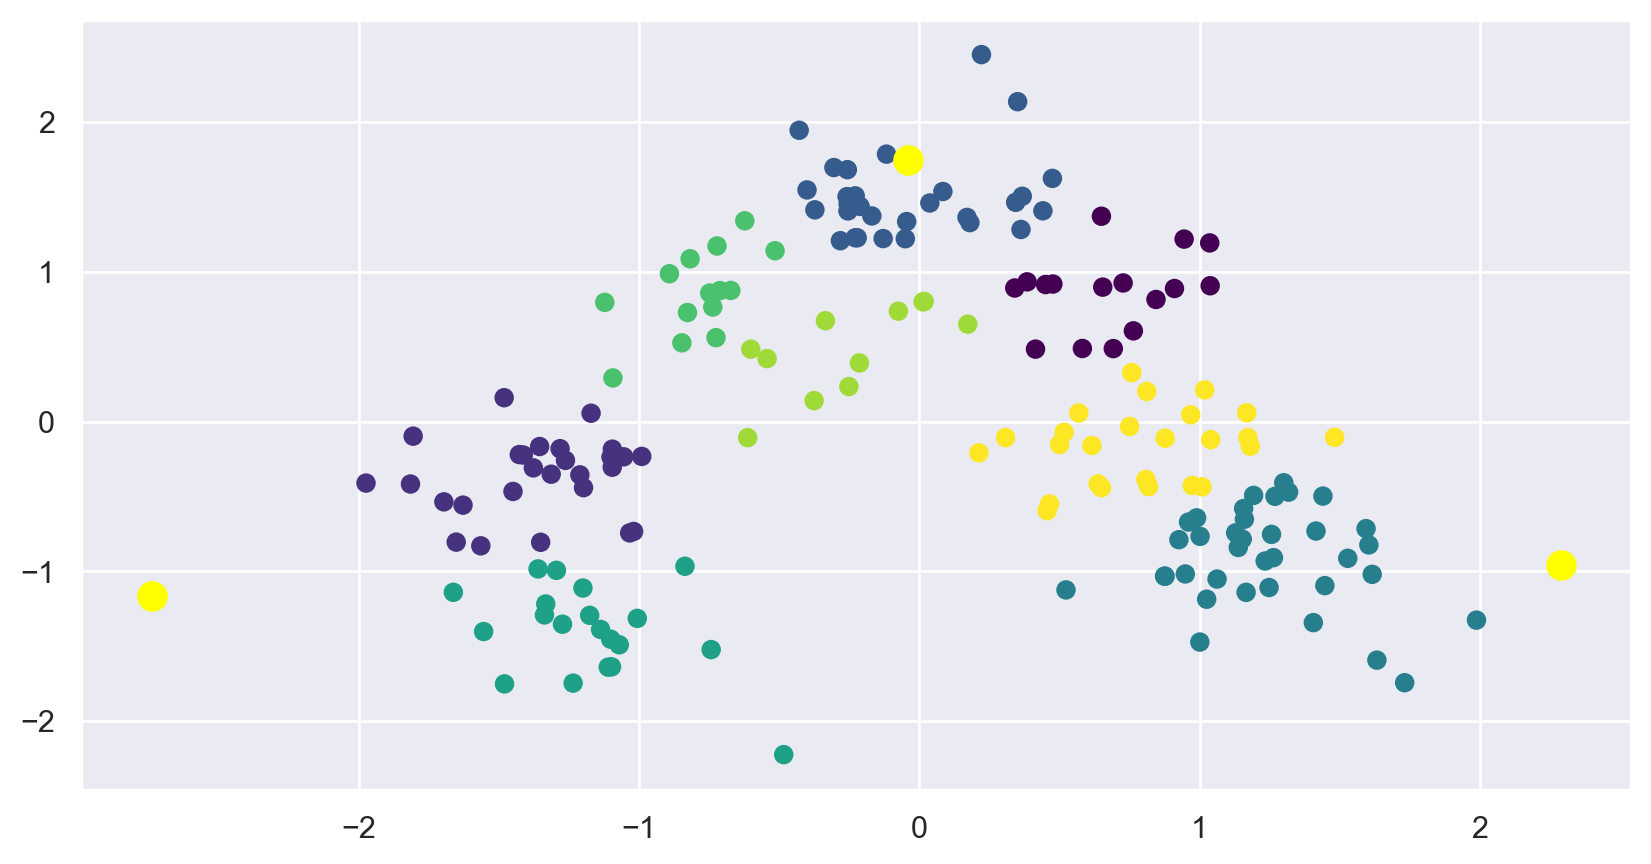

In [113]:
plt.scatter(x_[:,0],x_[:,1],c = y_p,cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow' ,s = 100 )

In [101]:
km.inertia_

26.219761305204457

In [ ]:
# Elbow Graph

In [103]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x_)
    wcss.append(km.inertia_)

In [104]:
wcss

[356.0,
 207.34506009582043,
 76.08799709977357,
 61.07359795257844,
 47.49545649347303,
 36.56837795085511,
 28.441841000971678,
 25.80157515264158,
 23.729713507724394,
 21.91301770138601]

Text(0.5, 1.0, 'Elbow Graph')

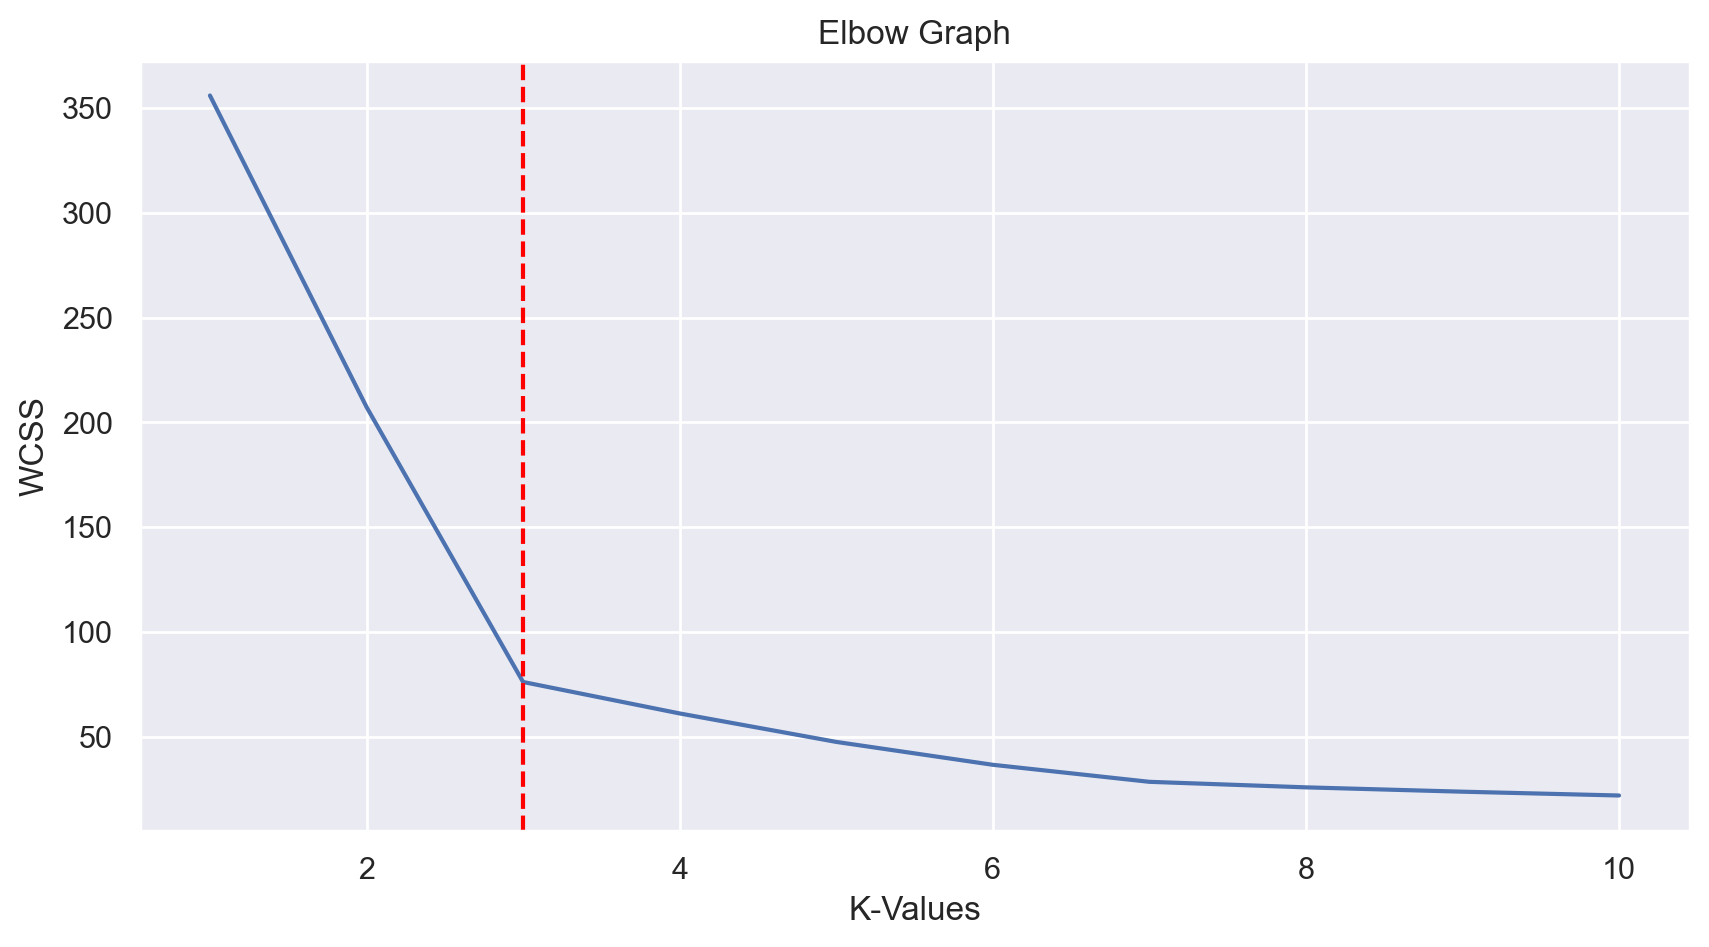

In [105]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 3, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [ ]:
# Final Model

In [106]:
km = KMeans(n_clusters=3)
ypred_ = km.fit_predict(data)
ypred_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
#Visualize the clusters

In [107]:
km.cluster_centers_

array([[ 2.28888211, -0.95994724],
       [-2.73771147, -1.16476397],
       [-0.04083933,  1.74320866]])

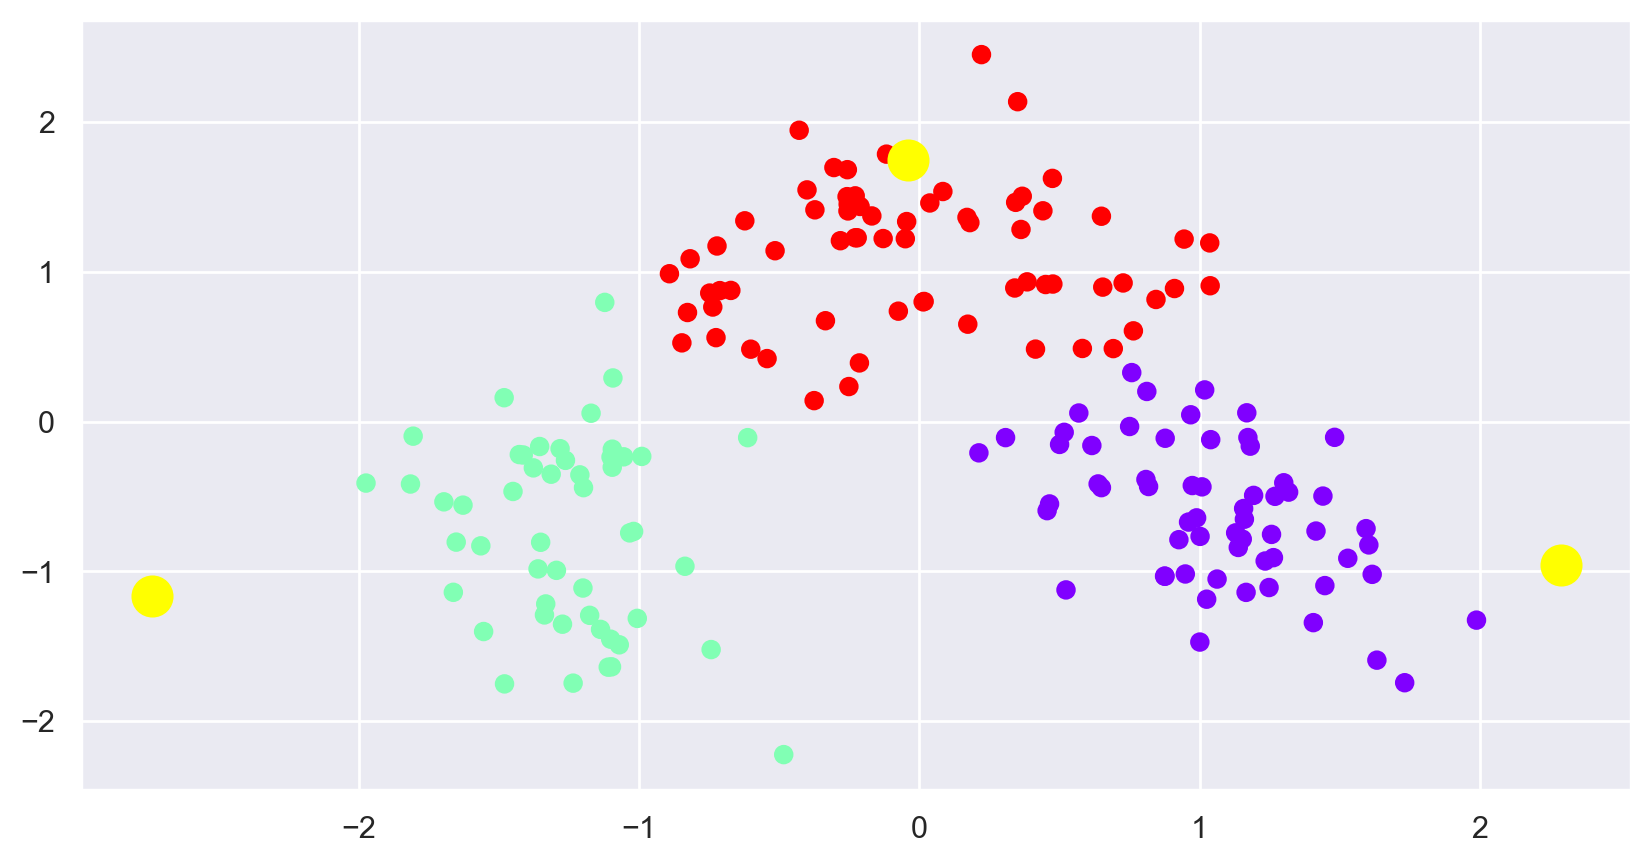

In [114]:
plt.scatter(x_[:,0],x_[:,1], c = ypred_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

In [ ]:
#Silhouette score

In [115]:
x_

array([[ 1.52895179, -0.91347898],
       [ 1.01851648,  0.21098391],
       [ 1.16016384, -0.65255242],
       [ 1.73192758, -1.74433875],
       [ 0.46508542, -0.55046259],
       [ 1.40610238, -1.34313751],
       [ 1.1289784 , -0.7434906 ],
       [ 0.94935673, -1.01821406],
       [ 1.15745981, -0.58099081],
       [ 1.2693642 , -0.49958669],
       [ 1.60408482, -0.82416684],
       [ 0.80890388, -0.38728286],
       [ 0.97426132, -0.4276131 ],
       [ 1.59413696, -0.71550631],
       [ 1.98810193, -1.32641441],
       [ 1.06264288, -1.05212704],
       [ 1.00122533, -1.47280883],
       [ 0.87538544, -1.03239332],
       [ 1.63278002, -1.59370527],
       [ 0.96092053, -0.67152916],
       [ 1.44028332, -0.49797892],
       [ 0.50088576, -0.15298467],
       [ 1.16868454,  0.0581203 ],
       [ 0.75830474,  0.32672127],
       [ 0.81204912,  0.20070411],
       [ 0.45640547, -0.59529067],
       [ 0.81836534, -0.43423816],
       [ 0.56950425,  0.05683337],
       [ 1.00880892,

In [116]:
silhouette_score(x_,ypred_)

0.5752439885727296

In [117]:
#Analyzing clusters
data['cluster'] = ypred_
data

PC1       PC2  cluster
0    3.316751 -1.443463        0
1    2.209465  0.333393        0
2    2.516740 -1.031151        0
3    3.757066 -2.756372        0
4    1.008908 -0.869831        0
..        ...       ...      ...
173 -3.370524 -2.216289        1
174 -2.601956 -1.757229        1
175 -2.677839 -2.760899        1
176 -2.387017 -2.297347        1
177 -3.208758 -2.768920        1

[178 rows x 3 columns]

In [119]:
data.groupby('cluster').agg('mean')

PC1       PC2
cluster                    
0        2.288882 -0.959947
1       -2.737711 -1.164764
2       -0.040839  1.743209

In [120]:
data['cluster'].value_counts()

cluster
2    67
0    61
1    50
Name: count, dtype: int64

### conclusion

In [ ]:
# 1.Summarize the key findings and insights from the assignment

PCA is a powerful tool for simplifying complex data, reducing dimensionality, and uncovering patterns in datasets. It enhances data visualization, improves the performance of clustering and classification models, and filters out noise, all while providing insights into the structure and relationships between variables. However, careful consideration is needed to balance dimensionality reduction with potential information loss.

In [ ]:
# 2. Discuss practical implications of using PCA and clustering in data analysis.

PCA simplifies data, improves visualization, and enhances model performance.
Clustering helps identify patterns, detect anomalies, and create meaningful groups in data.
When combined, they offer a powerful approach to analyzing and extracting insights from complex, high-dimensional datasets.

In [ ]:
# 3.Provide recommendations for when to use each technique based on the analysis conducted.

PCA is best used for dimensionality reduction, data visualization, handling correlated features, and noise reduction.
Clustering is ideal for unsupervised learning, grouping similar data, identifying anomalies, and summarizing large datasets.
Combining PCA and Clustering is recommended when working with high-dimensional data, improving clustering performance, or visualizing clusters effectively.